In [39]:
import torch
import torch.nn as nn
import torch.nn.functional as F
model_dct = dict()
# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(10, 5)
        self.fc2 = nn.Linear(5, 3)
        self.fc3 = nn.Linear(3, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model
model = SimpleNN()

# Define the hook function
def hook_fn(module, input, output):
    global model_dct
    print(f'Layer: {module.__class__.__name__}')
    print(f'Input: {input}')
    print(f'Output: {output}')
    print('---')

    model_dct[module.__class__.__name__]= (input,output)

# Register the hook to each layer

for layer in model.children():
    layer.register_forward_hook(hook_fn)

# Create a sample input tensor
input_tensor = torch.randn(1, 10)

# Perform a forward pass
output = model(input_tensor)


Layer: Linear
Input: (tensor([[-2.0542,  0.2818, -0.0182,  0.1220,  1.6141, -0.2060, -0.8571,  0.3459,
          0.4749, -0.4577]]),)
Output: tensor([[ 0.8299, -0.2023,  0.9704, -0.1035, -0.4188]],
       grad_fn=<AddmmBackward0>)
---
Layer: Linear
Input: (tensor([[0.8299, 0.0000, 0.9704, 0.0000, 0.0000]], grad_fn=<ReluBackward0>),)
Output: tensor([[0.0847, 0.6403, 0.2206]], grad_fn=<AddmmBackward0>)
---
Layer: Linear
Input: (tensor([[0.0847, 0.6403, 0.2206]], grad_fn=<ReluBackward0>),)
Output: tensor([[-0.3049]], grad_fn=<AddmmBackward0>)
---


In [25]:
input_tensor

tensor([[ 0.0361,  0.1989,  1.0525, -0.6517,  1.0129, -0.0128,  0.2524, -1.1850,
          1.9644,  0.1705]])

In [26]:
output

tensor([[-0.5526]], grad_fn=<AddmmBackward0>)

In [28]:
model_dct

{'Linear': ((tensor([[0.2608, 0.0000, 0.1055]], grad_fn=<ReluBackward0>),),
  tensor([[-0.5526]], grad_fn=<AddmmBackward0>))}

In [36]:
 import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Define the hook function to store activations
def activation_hook(module, input, output):
    activation = output.detach().cpu().numpy()  # Detach from the computation graph and move to CPU
    activations.append((module.__class__.__name__, activation))

# Initialize the list to store activations
activations = []

# Define a sample model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.layer1 = nn.Linear(10, 5)
        self.layer2 = nn.ReLU()
        self.layer3 = nn.Linear(5, 3)
        self.layer4 = nn.ReLU()
        self.layer5 = nn.Linear(3, 1)
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        return x

model = SimpleModel()

# Register hooks to each layer
for name, layer in model.named_modules():
    if isinstance(layer, (nn.Linear, nn.ReLU)):  # You can include other types if needed
        layer.register_forward_hook(activation_hook)

# Create dummy input
input_tensor = torch.randn(1, 10)

# Forward pass through the model
model(input_tensor)


tensor([[0.6017]], grad_fn=<AddmmBackward0>)

In [41]:
model_dct

{'Linear': ((tensor([[0.0847, 0.6403, 0.2206]], grad_fn=<ReluBackward0>),),
  tensor([[-0.3049]], grad_fn=<AddmmBackward0>))}

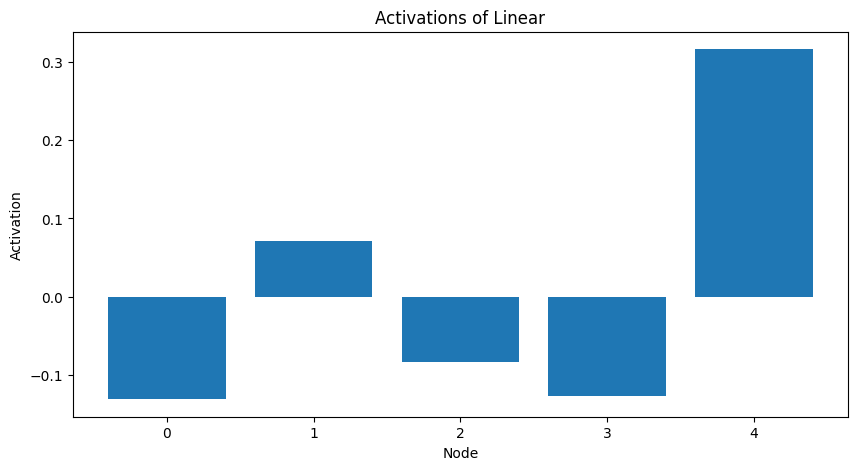

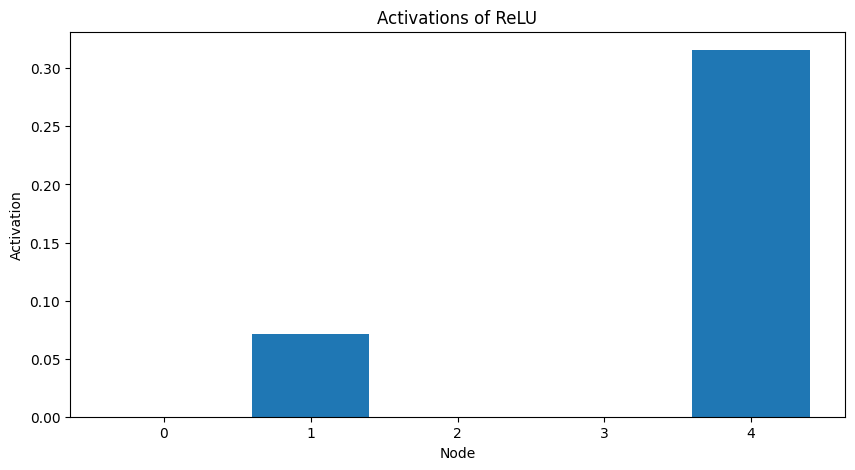

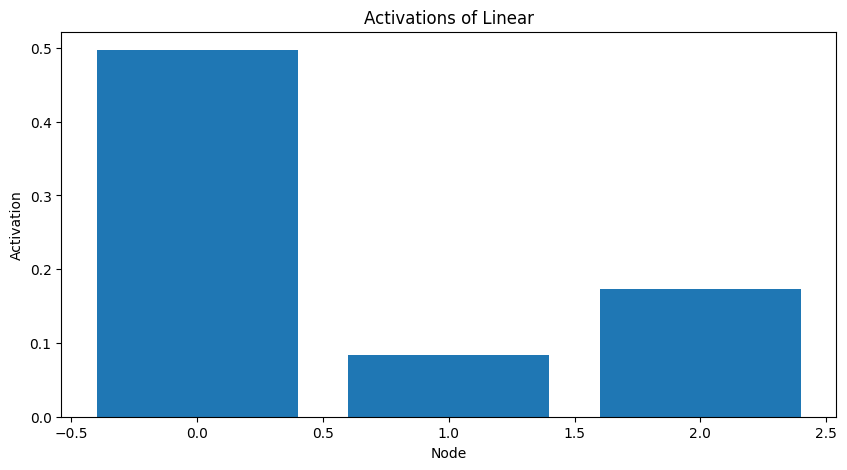

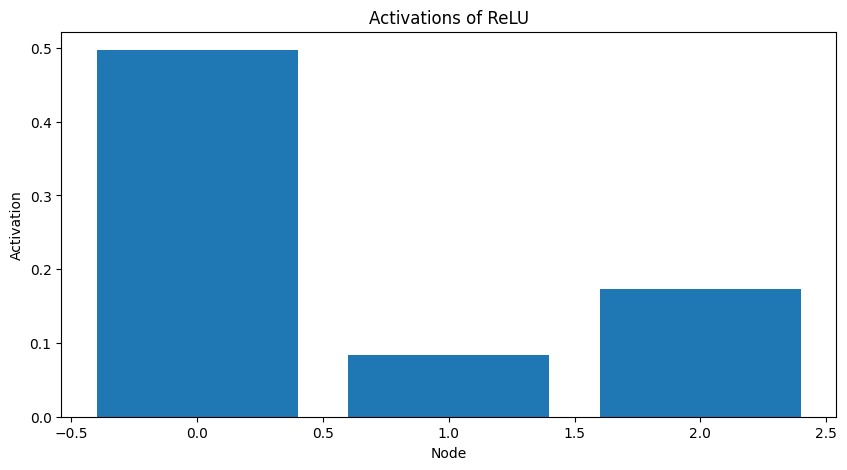

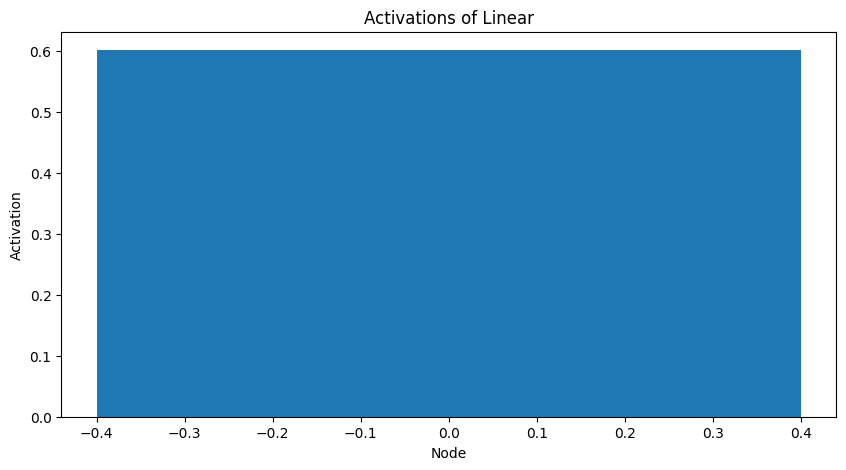

In [37]:
def visualize_activations(activations):
    for i, (layer_name, activation) in enumerate(activations):
        plt.figure(figsize=(10, 5))
        plt.title(f'Activations of {layer_name}')
        num_features = activation.shape[1] if activation.ndim == 2 else activation.shape[0]
        plt.bar(range(num_features), activation[0])  # Assuming single sample, hence index 0
        plt.xlabel('Node')
        plt.ylabel('Activation')
        plt.show()

# Call the visualization function
visualize_activations(activations)

In [38]:
activations

[('Linear',
  array([[-0.13048047,  0.07123134, -0.08266638, -0.12700713,  0.31570452]],
        dtype=float32)),
 ('ReLU',
  array([[0.        , 0.07123134, 0.        , 0.        , 0.31570452]],
        dtype=float32)),
 ('Linear', array([[0.49718228, 0.0831939 , 0.17333418]], dtype=float32)),
 ('ReLU', array([[0.49718228, 0.0831939 , 0.17333418]], dtype=float32)),
 ('Linear', array([[0.60173804]], dtype=float32))]

In [46]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import csv

model_dct = dict()

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(10, 5)
        self.fc2 = nn.Linear(5, 3)
        self.fc3 = nn.Linear(3, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model
model = SimpleNN()

# Define the hook function
def hook_fn(module, input, output, layer_name):
    global model_dct
    print(f'Layer: {layer_name}')
    print(f'Input: {input}')
    print(f'Output: {output}')
    print('---')

    # Convert input and output tensors to lists for easier CSV storage
    input_list = [i.tolist() for i in input]
    output_list = output.tolist()

    # Store the data in the dictionary with the layer name as the key
    model_dct[layer_name] = (input_list, output_list)

# Register the hook to each layer with unique names
#layer_names = ['fc1', 'fc2', 'fc3']
for name, layer in enumerate(model.children()):
    name = 'fc'+str(name+1)
    layer.register_forward_hook(lambda module, input, output, name=name: hook_fn(module, input, output, name))

# Create a sample input tensor
input_tensor = torch.randn(1, 10)

# Perform a forward pass
output = model(input_tensor)

# Save the data to a CSV file



Layer: fc1
Input: (tensor([[ 0.7498,  0.6912, -2.3980, -0.1224,  0.9315, -0.2159,  0.0939,  1.1583,
          1.1945, -1.3186]]),)
Output: tensor([[ 0.0233,  0.0427,  0.2770,  0.1755, -0.8390]],
       grad_fn=<AddmmBackward0>)
---
Layer: fc2
Input: (tensor([[0.0233, 0.0427, 0.2770, 0.1755, 0.0000]], grad_fn=<ReluBackward0>),)
Output: tensor([[ 0.3895,  0.2972, -0.4099]], grad_fn=<AddmmBackward0>)
---
Layer: fc3
Input: (tensor([[0.3895, 0.2972, 0.0000]], grad_fn=<ReluBackward0>),)
Output: tensor([[0.2063]], grad_fn=<AddmmBackward0>)
---


In [47]:
model_dct

{'fc1': ([[[0.7498081922531128,
     0.6912314891815186,
     -2.397977352142334,
     -0.12240900844335556,
     0.931485652923584,
     -0.21590597927570343,
     0.09385944157838821,
     1.1582672595977783,
     1.1944986581802368,
     -1.3186142444610596]]],
  [[0.02326919138431549,
    0.04270434379577637,
    0.27698564529418945,
    0.17548342049121857,
    -0.8389754295349121]]),
 'fc2': ([[[0.02326919138431549,
     0.04270434379577637,
     0.27698564529418945,
     0.17548342049121857,
     0.0]]],
  [[0.3894943296909332, 0.2971775531768799, -0.4099433422088623]]),
 'fc3': ([[[0.3894943296909332, 0.2971775531768799, 0.0]]],
  [[0.20630180835723877]])}

In [61]:
for layer, (input, output) in model_dct.items():
        print([layer, input[0], output[0]])

['fc1', [[0.7498081922531128, 0.6912314891815186, -2.397977352142334, -0.12240900844335556, 0.931485652923584, -0.21590597927570343, 0.09385944157838821, 1.1582672595977783, 1.1944986581802368, -1.3186142444610596]], [0.02326919138431549, 0.04270434379577637, 0.27698564529418945, 0.17548342049121857, -0.8389754295349121]]
['fc2', [[0.02326919138431549, 0.04270434379577637, 0.27698564529418945, 0.17548342049121857, 0.0]], [0.3894943296909332, 0.2971775531768799, -0.4099433422088623]]
['fc3', [[0.3894943296909332, 0.2971775531768799, 0.0]], [0.20630180835723877]]


In [ ]:
with open('model_data.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Layer', 'Input', 'Output'])
    
    for layer, (input, output) in model_dct.items():
        writer.writerow([layer, input, output])